In [66]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
with open('ultimate_data_challenge.json') as ult:
    data = json.load(ult)

ult = pd.DataFrame(data)
ult

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [3]:
ult['signup_date'].value_counts()

signup_date
2014-01-18    2948
2014-01-25    2885
2014-01-11    2402
2014-01-24    2284
2014-01-17    2149
2014-01-31    2100
2014-01-19    2028
2014-01-10    2021
2014-01-06    1763
2014-01-01    1737
2014-01-26    1708
2014-01-23    1606
2014-01-07    1486
2014-01-04    1485
2014-01-30    1471
2014-01-09    1433
2014-01-16    1431
2014-01-22    1369
2014-01-05    1343
2014-01-12    1334
2014-01-20    1295
2014-01-28    1284
2014-01-08    1275
2014-01-27    1236
2014-01-21    1234
2014-01-03    1213
2014-01-29    1197
2014-01-14    1120
2014-01-15    1110
2014-01-13    1049
2014-01-02    1004
Name: count, dtype: int64

In [5]:
with open('logins.json') as logins:
    data = json.load(logins)

login = pd.DataFrame(data)
login

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [6]:
# Convert 'login_time' column to datetime
login['login_time'] = pd.to_datetime(login['login_time'])

# Set 'login_time' as the index
login.set_index('login_time', inplace=True)

# Resample the DataFrame into 15-minute intervals and count the number of logins in each interval
login_count = login.resample('15T').size()

# Reset index to make 'login_time' a column again
login_count = login_count.reset_index()

# Rename the columns
login_count.columns = ['login_time', 'login_count']

# Print the result
print(login_count)

              login_time  login_count
0    1970-01-01 20:00:00            2
1    1970-01-01 20:15:00            6
2    1970-01-01 20:30:00            9
3    1970-01-01 20:45:00            7
4    1970-01-01 21:00:00            1
...                  ...          ...
9783 1970-04-13 17:45:00            5
9784 1970-04-13 18:00:00            5
9785 1970-04-13 18:15:00            2
9786 1970-04-13 18:30:00            7
9787 1970-04-13 18:45:00            6

[9788 rows x 2 columns]


In [8]:
login_count.sort_values(by='login_count', ascending=False)

,login_time,login_count
5602,1970-03-01 04:30:00,73
8870,1970-04-04 05:30:00,66
8854,1970-04-04 01:30:00,64
8853,1970-04-04 01:15:00,63
8654,1970-04-01 23:30:00,60
...,...,...
919,1970-01-11 09:45:00,0
4369,1970-02-16 08:15:00,0
2450,1970-01-27 08:30:00,0
2449,1970-01-27 08:15:00,0


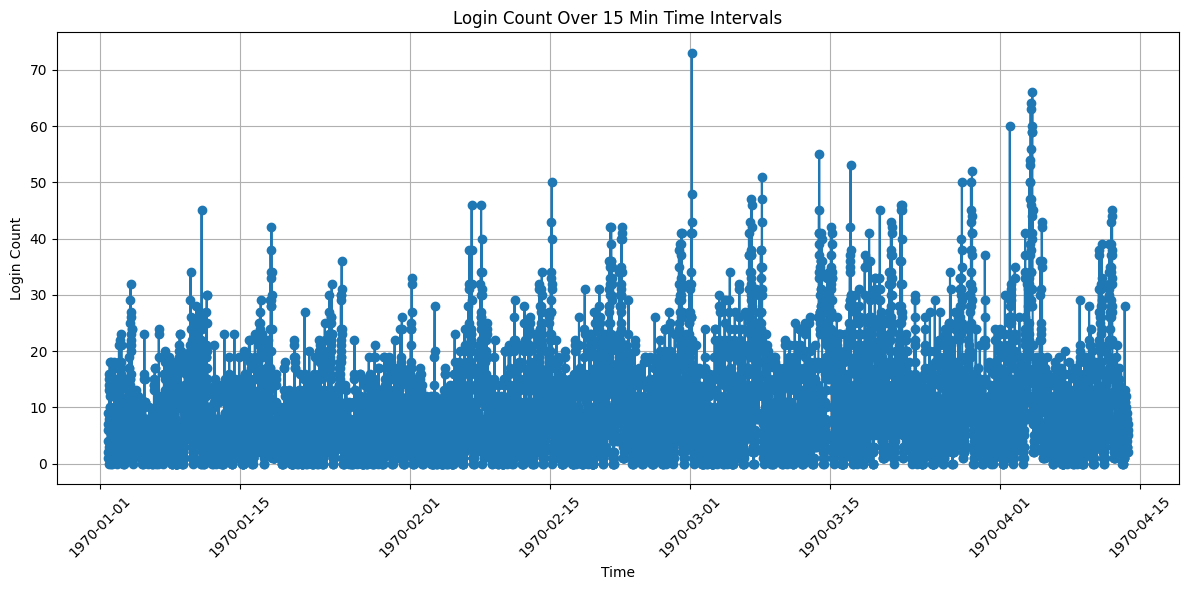

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(login_count['login_time'], login_count['login_count'], marker='o', linestyle='-')
plt.title('Login Count Over 15 Min Time Intervals')
plt.xlabel('Time')
plt.ylabel('Login Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

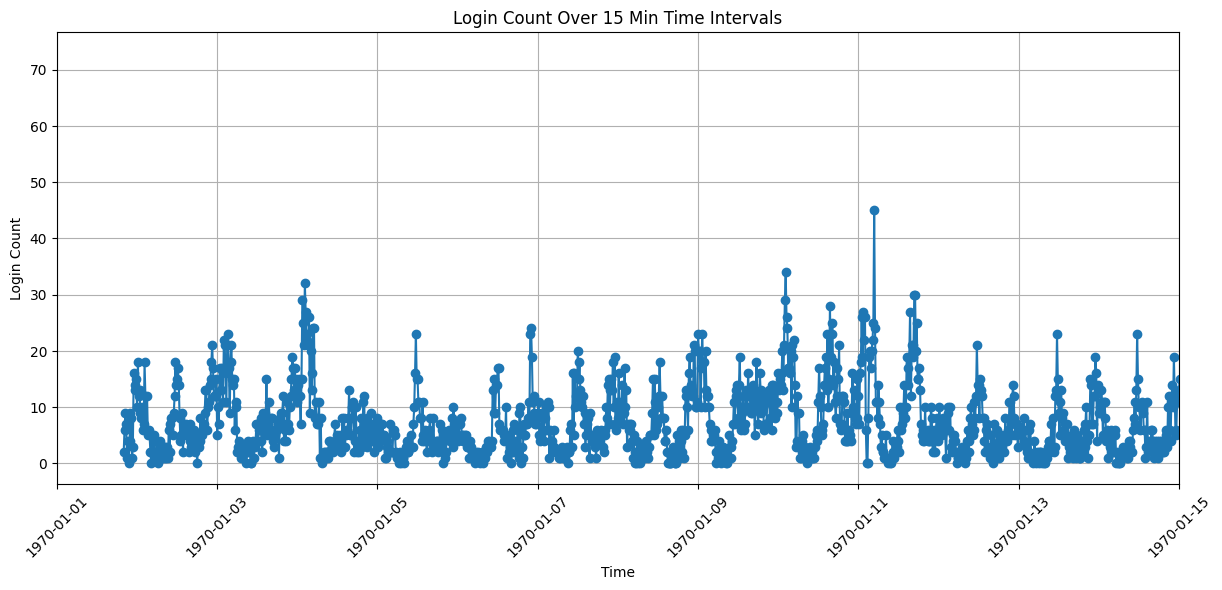

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(login_count['login_time'], login_count['login_count'], marker='o', linestyle='-')
plt.title('Login Count Over 15 Min Time Intervals')
plt.xlabel('Time')
plt.ylabel('Login Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.xlim(datetime.datetime(1970, 1, 1), datetime.datetime(1970, 1, 15))
plt.show()

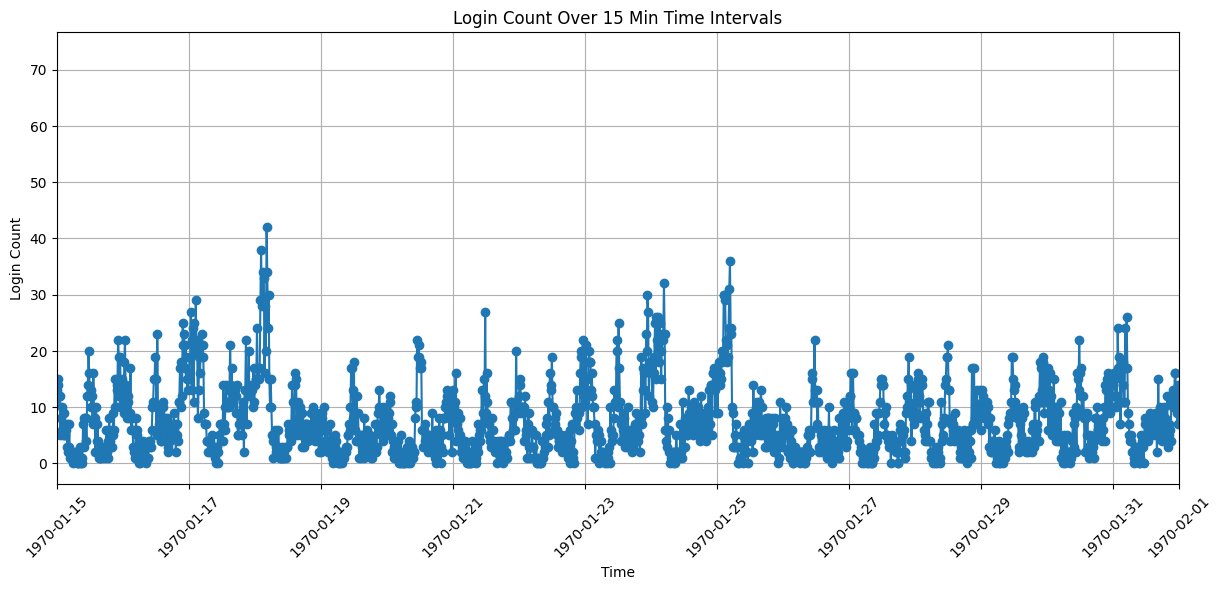

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(login_count['login_time'], login_count['login_count'], marker='o', linestyle='-')
plt.title('Login Count Over 15 Min Time Intervals')
plt.xlabel('Time')
plt.ylabel('Login Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.xlim(datetime.datetime(1970, 1, 15), datetime.datetime(1970, 2, 1))
plt.show()

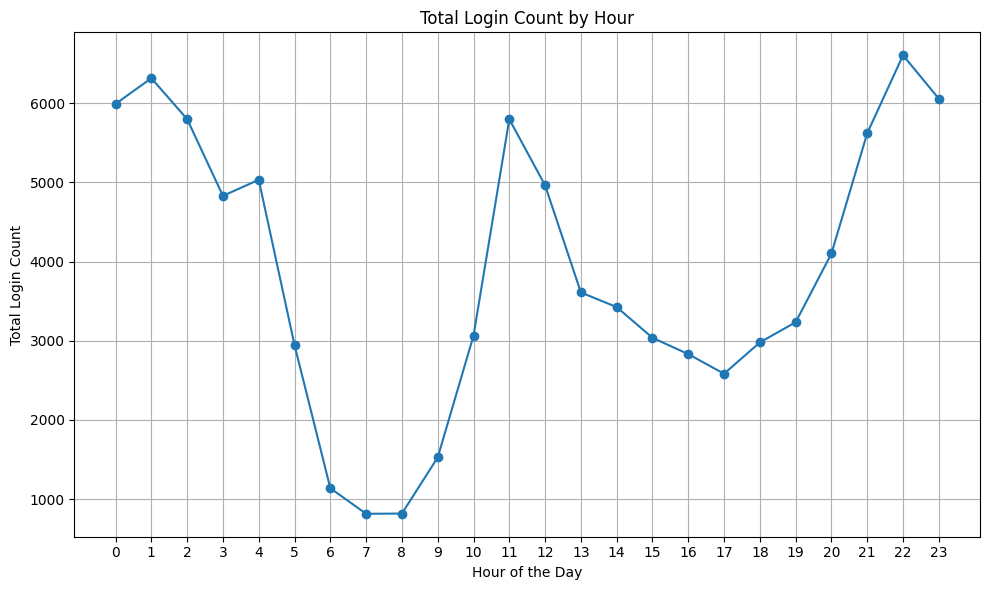

In [44]:
total_login_count_per_hour = login_count.groupby('hour')['login_count'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(total_login_count_per_hour.index, total_login_count_per_hour.values, marker='o', linestyle='-')
plt.title('Total Login Count by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Login Count')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
# login_count['date'] = login_count['login_time'].dt.date

# # login_count

# # Get unique dates
# unique_dates = login_count['date'].unique()

# # Loop through each date and plot
# for date in unique_dates:
#     # Filter data for the current date
#     data_for_date = login_count[login_count['date'] == date]
    
#     # Aggregate login counts per hour for the current date
#     total_login_count_per_hour = data_for_date.groupby('hour')['login_count'].sum()
    
#     # Plot
#     plt.figure(figsize=(10, 6))
#     plt.plot(total_login_count_per_hour.index, total_login_count_per_hour.values, marker='o', linestyle='-')
#     plt.title('Total Login Count by Hour for {}'.format(date))
#     plt.xlabel('Hour of the Day')
#     plt.ylabel('Total Login Count')
#     plt.xticks(range(24))
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

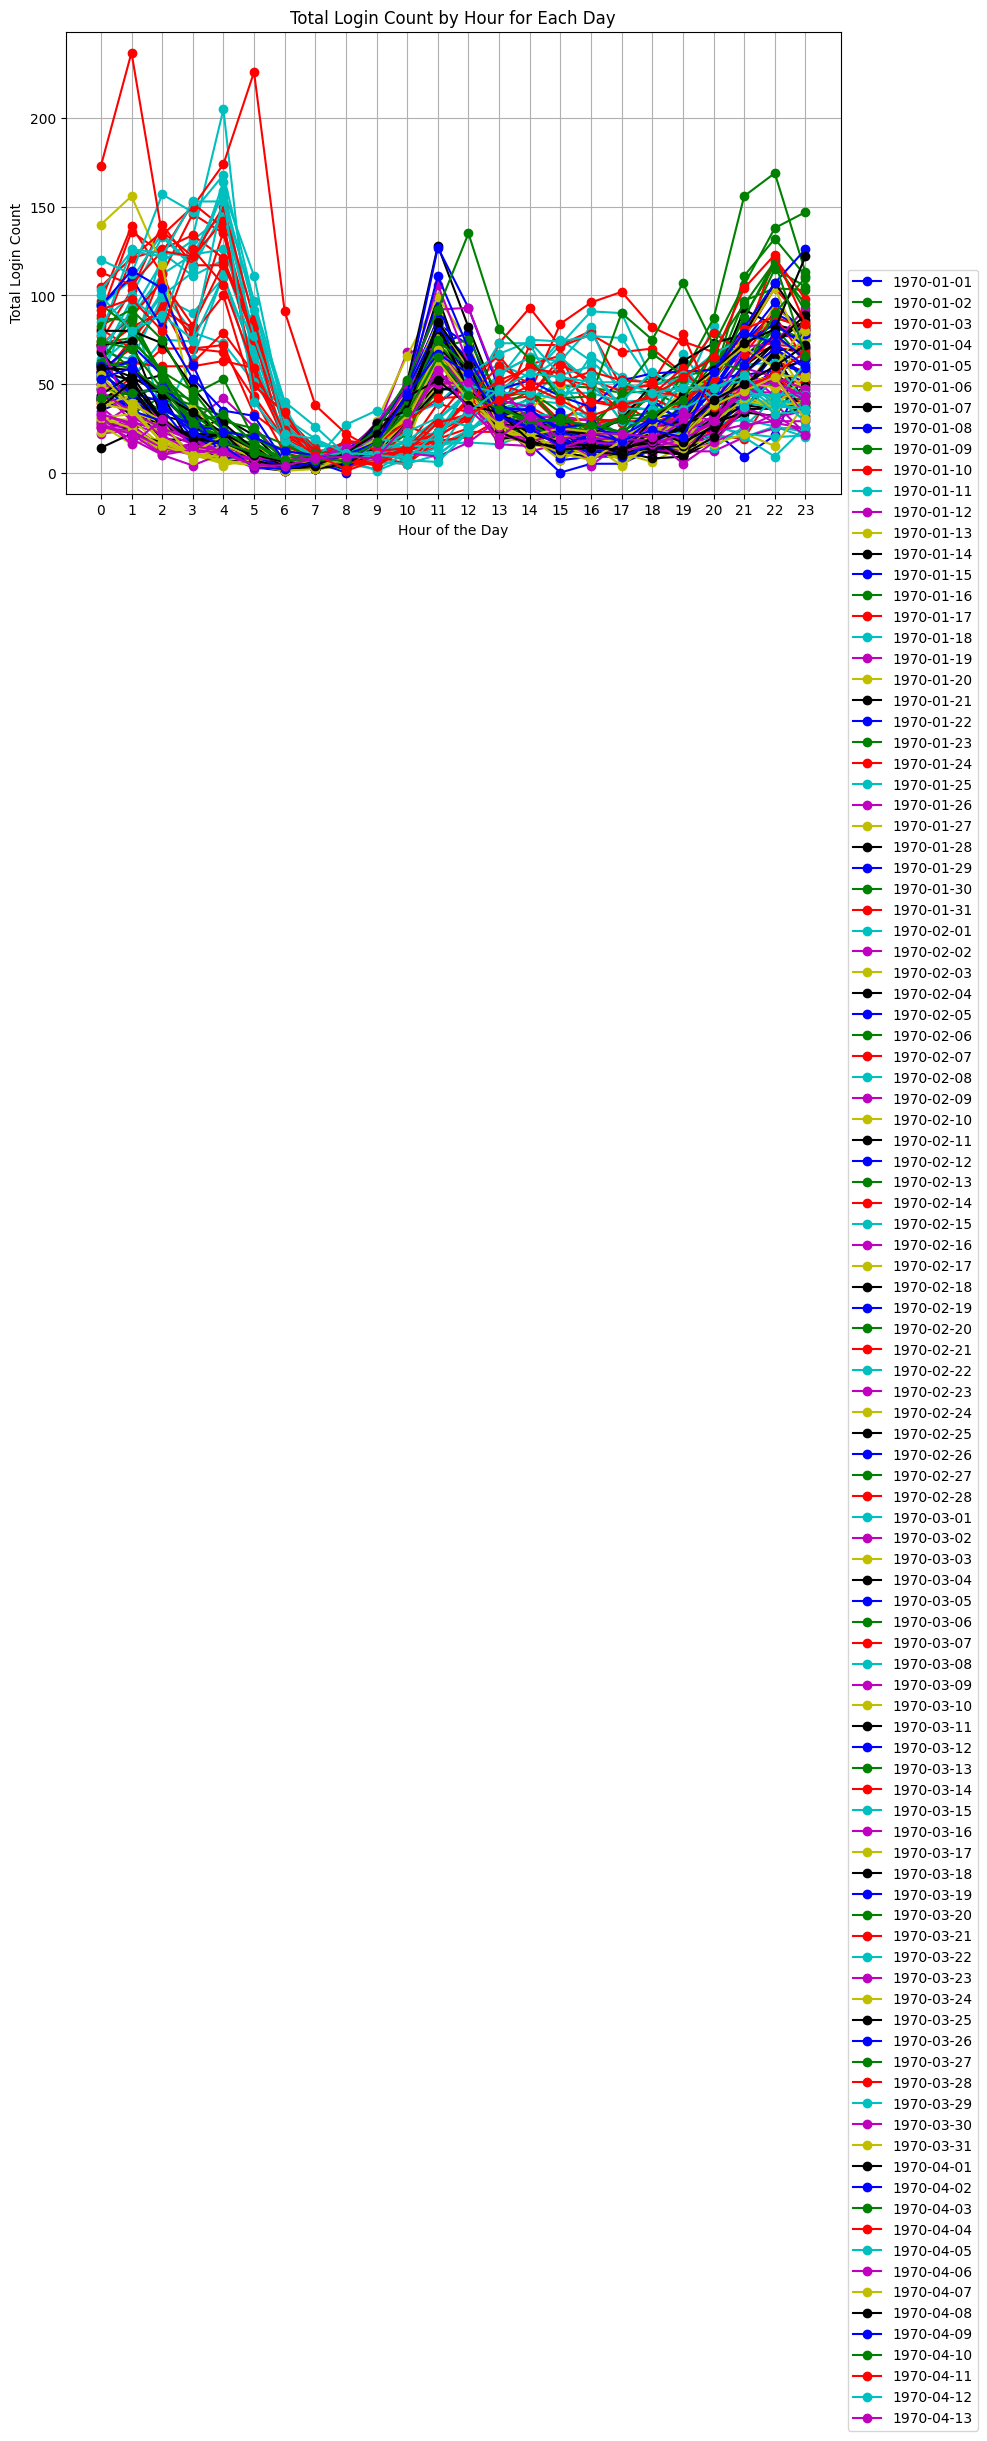

In [54]:
# Get unique dates
unique_dates = login_count['date'].unique()

# Initialize a list to store colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Plotting
plt.figure(figsize=(10, 6))

# Loop through each date and plot
for i, date in enumerate(unique_dates):
    # Filter data for the current date
    data_for_date = login_count[login_count['date'] == date]
    
    # Aggregate login counts per hour for the current date
    total_login_count_per_hour = data_for_date.groupby('hour')['login_count'].sum()
    
    # Plot
    plt.plot(total_login_count_per_hour.index, total_login_count_per_hour.values, marker='o', linestyle='-', color=colors[i % len(colors)], label=date)

plt.title('Total Login Count by Hour for Each Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Login Count')
plt.xticks(range(24))
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
# plt.tight_layout()
plt.show()

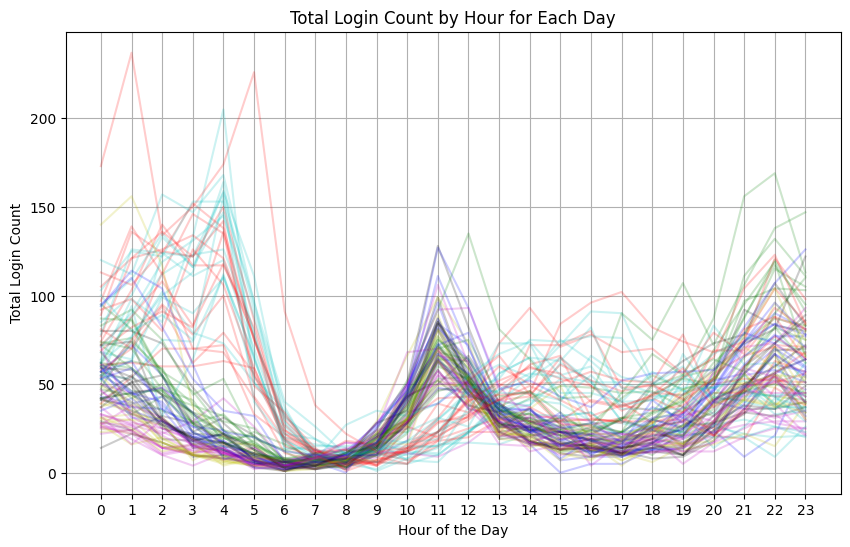

In [58]:
# Get unique dates
unique_dates = login_count['date'].unique()

# Initialize a list to store colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Plotting
plt.figure(figsize=(10, 6))

# Loop through each date and plot
for i, date in enumerate(unique_dates):
    # Filter data for the current date
    data_for_date = login_count[login_count['date'] == date]
    
    # Aggregate login counts per hour for the current date
    total_login_count_per_hour = data_for_date.groupby('hour')['login_count'].sum()
    
    # Plot
    plt.plot(total_login_count_per_hour.index, total_login_count_per_hour.values, linestyle='-', color=colors[i % len(colors)], label=date, alpha=.2)

plt.title('Total Login Count by Hour for Each Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Login Count')
plt.xticks(range(24))
plt.grid(True)
# plt.tight_layout()
plt.show()

<span style="font-size:20px;">Based on the graphs above, you can see an increase in logins around 4 am, 11 am, and 10 pm.</span>

<span style="font-size:20px;">2a. The amount of logins for the corresponding city for the corresponding time would be a good metric. This is because the amount of logins is analagous to the amount of drivers and passengers interested in traveling at that time.</span>

<span style="font-size:20px;">2b. I could use ANOVA to compare the before and after login counts for specific cities at specific times.</span>

<span style="font-size:20px;">2c. I would check the F-statistic and p-value and go from there. I would explain the caveats of ANOVA that it can be sensitive to outliers and assumes normality.</span>

In [67]:
ult['retention'] = np.where(ult['last_trip_date'] >= pd.to_datetime('2014-06-01'), 'Yes', 'No')

In [71]:
ult

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,Yes
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,No
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,No
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,Yes
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,Yes
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,No
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,No
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,No


In [69]:
ult['retention'].value_counts()

retention
No     31196
Yes    18804
Name: count, dtype: int64

In [72]:
(18804/(18804+31196))

0.37608

<span style="font-size:20px;">37.6% of users were retained.</span>

In [100]:
y = ult['retention']
X = ult.drop(['signup_date', 'last_trip_date', 'retention'], axis=1)

# Deal with null values

avg_rating_of_driver_mean = X['avg_rating_of_driver'].mean()
avg_rating_by_driver_mean = X['avg_rating_by_driver'].mean()

X['avg_rating_of_driver'].fillna(avg_rating_of_driver_mean, inplace=True)
X['avg_rating_by_driver'].fillna(avg_rating_by_driver_mean, inplace=True)

X = pd.get_dummies(X, columns=['city', 'phone', 'ultimate_black_user'])

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with feature scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('regressor', LinearRegression())  # Linear regression model
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

ValueError: could not convert string to float: 'No'

In [92]:
X.isnull().sum()

trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
city_Astapor              0
city_King's Landing       0
city_Winterfell           0
phone_Android             0
phone_iPhone              0
dtype: int64

In [93]:
print(X.dtypes)

trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
city_Astapor                        bool
city_King's Landing                 bool
city_Winterfell                     bool
phone_Android                       bool
phone_iPhone                        bool
dtype: object


In [103]:
if 'No' in X.values:
    print("Yes, there is a value 'No' in the DataFrame.")
else:
    print("No, there is no value 'No' in the DataFrame.")

No, there is no value 'No' in the DataFrame.
